In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Question 2

In [2]:
df_alleles = pd.read_csv('/Users/cmdb/qbb2020/day2/3-evening/matrix_1kg.txt',
                      sep = '\t')
df_alleles

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_alleles_alt_freq = df_alleles.iloc[:, 4:].sum(axis = 1)/(2548*2)
df_alleles_alt_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

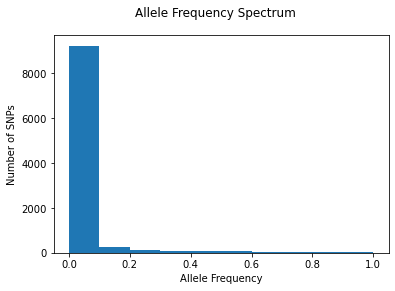

In [4]:
fig, ax = plt.subplots()
ax.hist(df_alleles_alt_freq)
fig.suptitle("Allele Frequency Spectrum")
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Number of SNPs")
plt.show()

#Question 3

In [5]:
roi = df_alleles_alt_freq < 0.95
roi

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

In [6]:
df_common_var = df_alleles.loc[roi]
df_common_var

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
roi2 = df_alleles_alt_freq > 0.05
roi2

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df_common_var2 = df_common_var.loc[roi2]
df_common_var2

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


#Question 4

In [9]:
pca_input = df_common_var2.iloc[:, 4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [10]:
pca_input = pca_input.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [11]:
pca_input.var(axis = 0)

20      0.150510
32      0.504333
38      0.525402
41      0.193247
46      0.187694
          ...   
9957    0.287020
9959    0.213553
9974    0.320414
9975    0.349529
9980    0.180783
Length: 986, dtype: float64

In [12]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [13]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input)
pca_output

array([[-3.33074795, -5.97760705, -1.81247512, ..., -3.43586334,
         1.90543838,  0.53036282],
       [-3.31092203, -4.98758172,  0.97533419, ...,  0.30109298,
        -1.09045469, -2.22583492],
       [-3.52079279, -5.02341042, -0.82920761, ...,  0.41810972,
         0.6410172 ,  0.76465326],
       ...,
       [-2.51195959, -2.23418508, -2.73803556, ...,  2.52658131,
        -1.19728765, -0.32158334],
       [-3.88777835, -1.51998203, -1.29016322, ...,  2.3514028 ,
        -0.72399345, -1.18974026],
       [-1.34897431, -0.27325708, -2.59082905, ...,  0.87820302,
        -1.47452797, -0.30354027]])

In [15]:
pca_output.shape

(2548, 10)

In [16]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.330748,-5.977607,-1.812475,-2.684979,-2.014493,0.560640,1.554604,-3.435863,1.905438,0.530363
1,-3.310922,-4.987582,0.975334,-2.522324,-0.948502,-1.332533,3.448255,0.301093,-1.090455,-2.225835
2,-3.520793,-5.023410,-0.829208,-1.228161,-1.434195,2.513129,-1.840651,0.418110,0.641017,0.764653
3,-2.884074,-4.336402,0.629498,-4.067901,1.547492,0.757030,-0.356430,-0.938483,0.531927,0.674773
4,-3.945691,-5.417686,1.849393,0.573163,-2.949382,0.146321,-2.785617,-0.185293,0.250702,0.631807
...,...,...,...,...,...,...,...,...,...,...
2543,-3.967068,0.214569,-0.987275,2.320432,0.911307,-0.226176,0.378987,-0.075887,2.917443,-2.011878
2544,-4.127514,-2.197813,-3.539439,1.491608,2.730095,2.281167,-2.147419,-1.371039,0.175253,-0.772512
2545,-2.511960,-2.234185,-2.738036,2.068369,1.470669,-0.056372,-1.059667,2.526581,-1.197288,-0.321583
2546,-3.887778,-1.519982,-1.290163,4.061458,-1.304699,-1.734709,-1.065702,2.351403,-0.723993,-1.189740


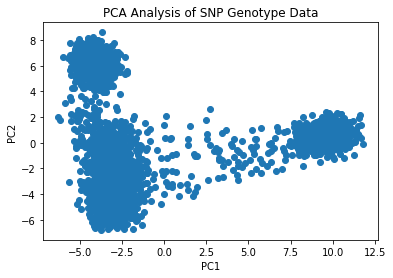

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title("PCA Analysis of SNP Genotype Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

#Downloaded the metadata using wget in the terminal

#Question 6

In [18]:
pca_output_df['SAMPID'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID
0,-3.330748,-5.977607,-1.812475,-2.684979,-2.014493,0.560640,1.554604,-3.435863,1.905438,0.530363,HG00096
1,-3.310922,-4.987582,0.975334,-2.522324,-0.948502,-1.332533,3.448255,0.301093,-1.090455,-2.225835,HG00097
2,-3.520793,-5.023410,-0.829208,-1.228161,-1.434195,2.513129,-1.840651,0.418110,0.641017,0.764653,HG00099
3,-2.884074,-4.336402,0.629498,-4.067901,1.547492,0.757030,-0.356430,-0.938483,0.531927,0.674773,HG00100
4,-3.945691,-5.417686,1.849393,0.573163,-2.949382,0.146321,-2.785617,-0.185293,0.250702,0.631807,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-3.967068,0.214569,-0.987275,2.320432,0.911307,-0.226176,0.378987,-0.075887,2.917443,-2.011878,NA21137
2544,-4.127514,-2.197813,-3.539439,1.491608,2.730095,2.281167,-2.147419,-1.371039,0.175253,-0.772512,NA21141
2545,-2.511960,-2.234185,-2.738036,2.068369,1.470669,-0.056372,-1.059667,2.526581,-1.197288,-0.321583,NA21142
2546,-3.887778,-1.519982,-1.290163,4.061458,-1.304699,-1.734709,-1.065702,2.351403,-0.723993,-1.189740,NA21143


In [19]:
df_metadata = pd.read_csv("/Users/cmdb/qbb2020/day2/3-evening/integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
df_metadata = df_metadata.iloc[:, :4] #getting rid of the two extra columns
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [20]:
#rename first column to match pca_output_df
df_metadata.columns = ['SAMPID', 'pop', 'super_pop', 'gender']
df_metadata

,SAMPID,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [21]:
pca_output_df = pd.merge(pca_output_df, df_metadata, on = "SAMPID")
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID,pop,super_pop,gender
0,-3.330748,-5.977607,-1.812475,-2.684979,-2.014493,0.560640,1.554604,-3.435863,1.905438,0.530363,HG00096,GBR,EUR,male
1,-3.310922,-4.987582,0.975334,-2.522324,-0.948502,-1.332533,3.448255,0.301093,-1.090455,-2.225835,HG00097,GBR,EUR,female
2,-3.520793,-5.023410,-0.829208,-1.228161,-1.434195,2.513129,-1.840651,0.418110,0.641017,0.764653,HG00099,GBR,EUR,female
3,-2.884074,-4.336402,0.629498,-4.067901,1.547492,0.757030,-0.356430,-0.938483,0.531927,0.674773,HG00100,GBR,EUR,female
4,-3.945691,-5.417686,1.849393,0.573163,-2.949382,0.146321,-2.785617,-0.185293,0.250702,0.631807,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-3.967068,0.214569,-0.987275,2.320432,0.911307,-0.226176,0.378987,-0.075887,2.917443,-2.011878,NA21137,GIH,SAS,female
2499,-4.127514,-2.197813,-3.539439,1.491608,2.730095,2.281167,-2.147419,-1.371039,0.175253,-0.772512,NA21141,GIH,SAS,female
2500,-2.511960,-2.234185,-2.738036,2.068369,1.470669,-0.056372,-1.059667,2.526581,-1.197288,-0.321583,NA21142,GIH,SAS,female
2501,-3.887778,-1.519982,-1.290163,4.061458,-1.304699,-1.734709,-1.065702,2.351403,-0.723993,-1.189740,NA21143,GIH,SAS,female


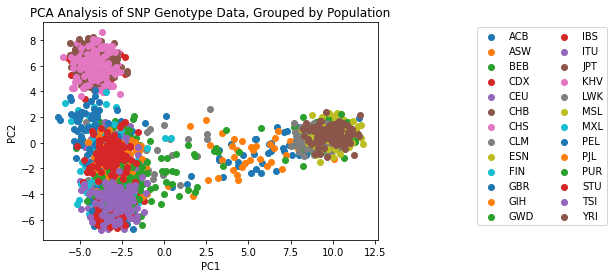

In [22]:
fig, ax = plt.subplots()
pop = pca_output_df.groupby("pop")

for name, group in pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
ax.set_title("PCA Analysis of SNP Genotype Data, Grouped by Population")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

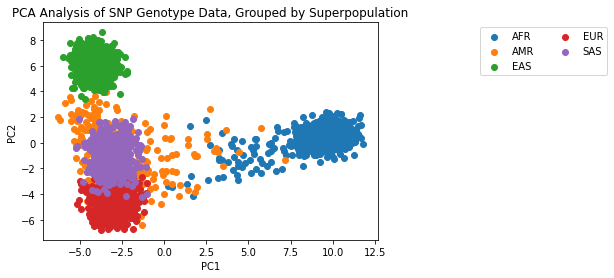

In [23]:
fig, ax = plt.subplots()
super_pop = pca_output_df.groupby("super_pop")

for name, group in super_pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
ax.set_title("PCA Analysis of SNP Genotype Data, Grouped by Superpopulation")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

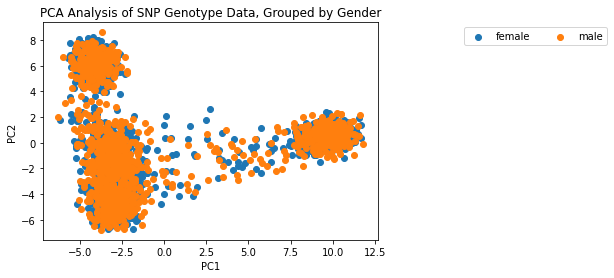

In [24]:
fig, ax = plt.subplots()
gender = pca_output_df.groupby("gender")

for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
ax.set_title("PCA Analysis of SNP Genotype Data, Grouped by Gender")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

#Question 7

In [25]:
from mpl_toolkits.mplot3d import Axes3D

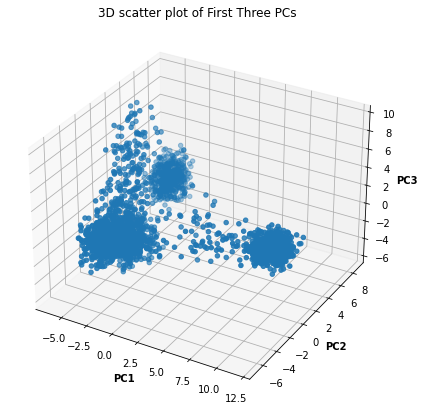

In [26]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

x = pca_output_df['PC1']
y = pca_output_df['PC2']
z = pca_output_df['PC3']

# Creating plot 
ax.scatter3D(x, y, z); 
plt.title("3D scatter plot of First Three PCs") 
ax.set_xlabel('PC1', fontweight ='bold')  
ax.set_ylabel('PC2', fontweight ='bold')  
ax.set_zlabel('PC3', fontweight ='bold') 
  
# show plot 
plt.show() 